<a href="https://colab.research.google.com/drive/1tipjFyDxpWbrDADCcJxa3dksq4Ktk_45?usp=drive_link" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Praktikum 3**
---
Praktikum 3 kali ini kita akan mencoba menggunakan Keras untuk Regresi, khususnya pada kasus Prediksi Harga Rumah.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

# Contoh dataset (buat dummy data)
data = pd.DataFrame({
    'luas': [50, 60, 70, 80, 90],
    'harga': [500, 600, 700, 800, 900]
})

X = data[['luas']]
y = data[['harga']]

# Normalisasi
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=100)

# Evaluasi
print("Prediksi:", model.predict(X_test))

Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 727ms/step - loss: 0.5503
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.5440
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.5378
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.5316
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.5255
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.5194
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - loss: 0.5133
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.5073
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 0.5014
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.4955
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.4896
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 0.4838
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - loss: 0.4780
Epoch 14/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.4723
Epoch 15/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 0.4666
Epoch 16/100
1/1 ━━━━━━━━━━━

Tugas 4:

* Ubah learning rate.

In [ ]:
# ============================
# TUGAS 4 NOMOR 1 — Ubah Learning Rate (California Housing)
# ============================

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# 1. Load dataset California Housing
data = fetch_california_housing()
X = data.data
y = data.target

# 2. Preprocess
scaler = StandardScaler()
Xs = scaler.fit_transform(X)

X_train, X_val, y_train, y_val = train_test_split(
    Xs, y, test_size=0.2, random_state=42
)

# ============================
# Model 1 — Learning Rate 0.01
# ============================
model_lr1 = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])

model_lr1.compile(optimizer=Adam(0.01), loss='mse', metrics=['mae'])

history_lr1 = model_lr1.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50, batch_size=32, verbose=0
)

# ============================
# Model 2 — Learning Rate 0.0001
# ============================
model_lr2 = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])

model_lr2.compile(optimizer=Adam(0.0001), loss='mse', metrics=['mae'])

history_lr2 = model_lr2.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50, batch_size=32, verbose=0
)

# ============================
# Perbandingan Loss
# ============================
loss_lr1 = history_lr1.history['val_loss'][-1]
loss_lr2 = history_lr2.history['val_loss'][-1]

print("=== Perbandingan Learning Rate ===")
print(f"LR 0.01   -> Val Loss: {loss_lr1:.4f}")
print(f"LR 0.0001 -> Val Loss: {loss_lr2:.4f}")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


=== Perbandingan Learning Rate ===
LR 0.01   -> Val Loss: 0.2816
LR 0.0001 -> Val Loss: 0.3327


* Bandingkan hasil loss.

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
import numpy as np

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)

# One-hot encoding
encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ------------------------
# MODEL AKTIVASI RELU
# ------------------------
model_relu = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(4,)),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_relu = model_relu.fit(X_train, y_train, epochs=50, batch_size=8, verbose=0)

loss_relu, acc_relu = model_relu.evaluate(X_test, y_test, verbose=0)

# ------------------------
# MODEL AKTIVASI SIGMOID
# ------------------------
model_sigmoid = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='sigmoid', input_shape=(4,)),
    tf.keras.layers.Dense(8, activation='sigmoid'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model_sigmoid.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_sigmoid = model_sigmoid.fit(X_train, y_train, epochs=50, batch_size=8, verbose=0)

loss_sigmoid, acc_sigmoid = model_sigmoid.evaluate(X_test, y_test, verbose=0)

# ------------------------
# CETAK HASIL PERBANDINGAN
# ------------------------
print("===== HASIL PERBANDINGAN LOSS =====")
print(f"Loss Model ReLU    : {loss_relu:.4f}")
print(f"Loss Model Sigmoid : {loss_sigmoid:.4f}")

print("\n===== HASIL PERBANDINGAN AKURASI =====")
print(f"Akurasi ReLU       : {acc_relu:.4f}")
print(f"Akurasi Sigmoid    : {acc_sigmoid:.4f}")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


===== HASIL PERBANDINGAN LOSS =====
Loss Model ReLU    : 0.1977
Loss Model Sigmoid : 0.5520

===== HASIL PERBANDINGAN AKURASI =====
Akurasi ReLU       : 0.9667
Akurasi Sigmoid    : 0.9000


Praktikum berikut akan menggunakan data Boston untuk memprediksi harga rumah.

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


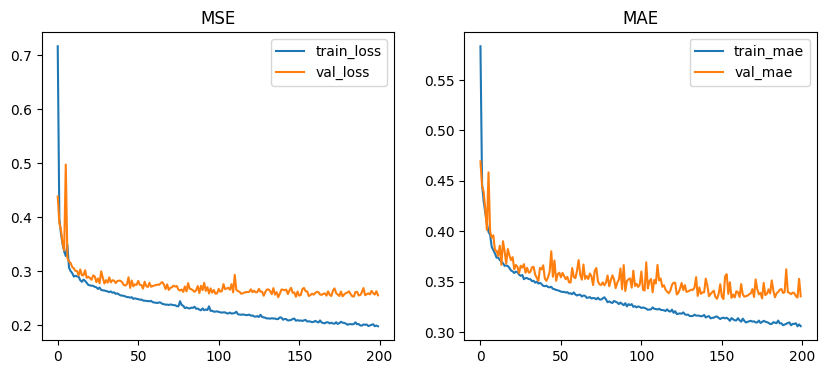

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
RMSE: 0.505439571088227


In [ ]:
# MLP regresi (Keras)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing # Changed from load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# 1. Load
housing = fetch_california_housing() # Changed to fetch_california_housing
X = housing.data; y = housing.target

# 2. Preprocess
scaler = StandardScaler(); Xs = scaler.fit_transform(X)
X_train, X_val, y_train, y_val = train_test_split(Xs, y, test_size=0.2, random_state=42)

# 3. Build model
model = Sequential([
Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
Dense(32, activation='relu'),
Dense(1)
])
model.compile(optimizer=Adam(1e-3), loss='mse', metrics=['mae'])

# 4. Train
h = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=200, batch_size=32, verbose=0)

# 5. Plot
plt.figure(figsize=(10,4))
plt.subplot(1,2,1); plt.plot(h.history['loss'], label='train_loss'); plt.plot(h.history['val_loss'], label='val_loss'); plt.legend(); plt.title('MSE')
plt.subplot(1,2,2); plt.plot(h.history['mae'], label='train_mae'); plt.plot(h.history['val_mae'], label='val_mae'); plt.legend(); plt.title('MAE')
plt.show()

from sklearn.metrics import mean_squared_error
pred = model.predict(X_val)
print('RMSE:', np.sqrt(mean_squared_error(y_val, pred)))